In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
df = pd.read_csv("data/Mastercard_historical_data.csv")

# İlk 5 satırı göster
df.head()


,Date,Open,High,Low,Close,Volume,ticker,name
0,2006-05-25 00:00:00-04:00,3.662180,4.184700,3.653093,4.180156,395343000,MA,Mastercard Inc. (MA) Historical Data
1,2006-05-26 00:00:00-04:00,4.207417,4.247400,4.008405,4.082921,103044000,MA,Mastercard Inc. (MA) Historical Data
2,2006-05-30 00:00:00-04:00,4.086556,4.087465,3.893905,3.998409,49898000,MA,Mastercard Inc. (MA) Historical Data
3,2006-05-31 00:00:00-04:00,4.030215,4.121996,4.030215,4.083830,30002000,MA,Mastercard Inc. (MA) Historical Data
4,2006-06-01 00:00:00-04:00,4.082920,4.370987,4.080193,4.317372,62344000,MA,Mastercard Inc. (MA) Historical Data


In [2]:
# Veri tipi bilgileri
df.info()

# Eksik değer sayıları
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4903 non-null   object 
 1   Open    4903 non-null   float64
 2   High    4903 non-null   float64
 3   Low     4903 non-null   float64
 4   Close   4903 non-null   float64
 5   Volume  4903 non-null   int64  
 6   ticker  4903 non-null   object 
 7   name    4903 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 306.6+ KB


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
ticker    0
name      0
dtype: int64

In [3]:
# Date kolonunu datetime formatına çevir
df['Date'] = pd.to_datetime(df['Date'])

# Tarihe göre sırala
df = df.sort_values('Date')

# İlk 5 satıra tekrar bakalım (tarih sıralı mı?)
df.head()


C:\Users\Fuat Üzülmez\AppData\Local\Temp\ipykernel_17348\537681189.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume,ticker,name
0,2006-05-25 00:00:00-04:00,3.662180,4.184700,3.653093,4.180156,395343000,MA,Mastercard Inc. (MA) Historical Data
1,2006-05-26 00:00:00-04:00,4.207417,4.247400,4.008405,4.082921,103044000,MA,Mastercard Inc. (MA) Historical Data
2,2006-05-30 00:00:00-04:00,4.086556,4.087465,3.893905,3.998409,49898000,MA,Mastercard Inc. (MA) Historical Data
3,2006-05-31 00:00:00-04:00,4.030215,4.121996,4.030215,4.083830,30002000,MA,Mastercard Inc. (MA) Historical Data
4,2006-06-01 00:00:00-04:00,4.082920,4.370987,4.080193,4.317372,62344000,MA,Mastercard Inc. (MA) Historical Data


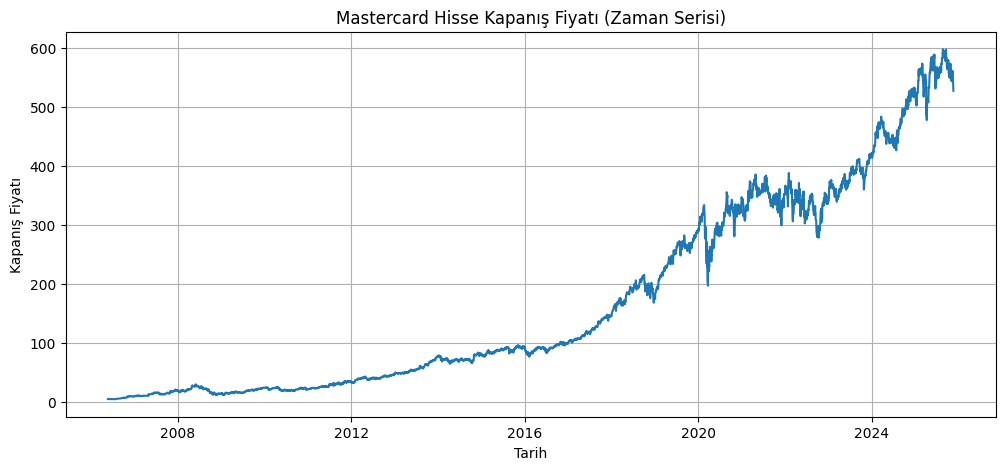

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'])
plt.xlabel("Tarih")
plt.ylabel("Kapanış Fiyatı")
plt.title("Mastercard Hisse Kapanış Fiyatı (Zaman Serisi)")
plt.grid(True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modelde kullanılacak özellikler (bağımsız değişkenler)
X = df[['Open', 'High', 'Low', 'Volume']]

# Tahmin etmeye çalıştığımız hedef (bağımlı değişken)
y = df['Close']

# Train / Test ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((3922, 4), (981, 4))

In [7]:
# Model oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Test verisiyle tahmin yap
y_pred = model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1.4898092404185757, 0.9999462983614157)

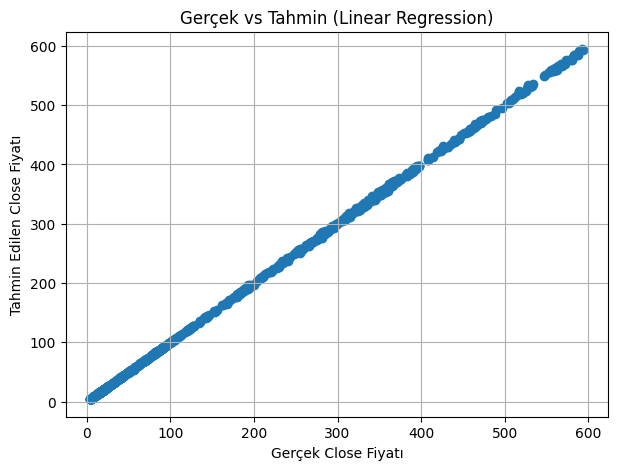

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Close Fiyatı")
plt.ylabel("Tahmin Edilen Close Fiyatı")
plt.title("Gerçek vs Tahmin (Linear Regression)")
plt.grid(True)
plt.show()
